In [ ]:
# ============================== loading libraries ===========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn import model_selection 
# =============================================================================

In [ ]:
## Part I
# ============================== data preprocessing =================================

# define column names
names = ['x', 'y', 'class']

# loading training data
df = pd.read_csv('3.concertriccir2.csv', header=None, names=names)
print(df.head())

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:2]) # end index is exclusive
y = np.array(df['class']) # showing you two ways of indexing a pandas df
df.shape

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


(500, 3)

# Simple Cross Validation

In [ ]:
# split the data set into train and test
X_1, X_test, y_1, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# split the train data set into cross validation train and cross validation test
X_tr, X_cv, y_tr, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.3)

for i in range(1,30,2):
    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=i)

    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    
knn = KNeighborsClassifier(1)  # overfit model
knn.fit(X_tr,y_tr)
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred, normalize=True) * float(100)
print('\n****Test accuracy for k = 1 is %d%%' % (acc))


CV accuracy for k = 1 is 89%

CV accuracy for k = 3 is 91%

CV accuracy for k = 5 is 90%

CV accuracy for k = 7 is 89%

CV accuracy for k = 9 is 90%

CV accuracy for k = 11 is 91%

CV accuracy for k = 13 is 91%

CV accuracy for k = 15 is 91%

CV accuracy for k = 17 is 91%

CV accuracy for k = 19 is 86%

CV accuracy for k = 21 is 86%

CV accuracy for k = 23 is 79%

CV accuracy for k = 25 is 80%

CV accuracy for k = 27 is 78%

CV accuracy for k = 29 is 76%

****Test accuracy for k = 1 is 91%


In [ ]:
print(X_test[5])

[ 0.49574688 -1.855849  ]


# 10 fold cross validation

[0.1508741496598638, 0.12221428571428561, 0.14262585034013608, 0.1672040816326531, 0.17961904761904768, 0.18761904761904769, 0.18770068027210896, 0.22027551020408165, 0.25318367346938775, 0.2613469387755103, 0.27776190476190465, 0.30633673469387757, 0.31866326530612243, 0.33915646258503407, 0.36373129251700675, 0.3718979591836734, 0.3921428571428571, 0.40838775510204084, 0.4084693877551021, 0.41663265306122443, 0.41663265306122443, 0.4207142857142857, 0.42488095238095247, 0.4207142857142857, 0.4328809523809525]

The optimal number of neighbors is 3.


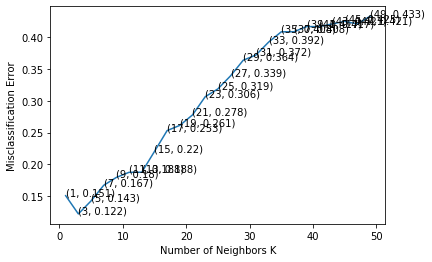

the misclassification error for each k value is :  [0.151 0.122 0.143 0.167 0.18  0.188 0.188 0.22  0.253 0.261 0.278 0.306
 0.319 0.339 0.364 0.372 0.392 0.408 0.408 0.417 0.417 0.421 0.425 0.421
 0.433]


In [ ]:


# creating odd list of K for KNN
myList = list(range(0,50))
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = model_selection.cross_val_score(knn, X_tr, y_tr, cv=5, scoring='accuracy')
    #print(scores) --- returns 5 scores bcz cv = 5
    cv_scores.append(scores.mean())
#print(cv_scores) -- no of loops(iterations)

# changing to misclassification error
MSE = [1 - x for x in cv_scores]
ACC = cv_scores
print(MSE)
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
#optimal_k = neighbors[ACC.index(max(ACC))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

# plot misclassification error vs k 
# #Accuracy vs k
plt.plot(neighbors, MSE)

for xy in zip(neighbors, np.round(MSE,3)):
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each k value is : ", np.round(MSE,3))
#print("Accuracy",np.round(ACC,3))

In [ ]:
# ============================== KNN with k = optimal_k ===============================================
# instantiate learning model k = optimal_k
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_tr, y_tr)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))


The accuracy of the knn classifier for k = 3 is 88.666667%


In [ ]:
pred = knn_optimal.predict(X_test[:6])
print('predicted values:',pred)
print('actual values:',y_test[:6])

predicted values: [0. 1. 0. 0. 0. 1.]
actual values: [0. 1. 0. 0. 0. 1.]
